<a href="https://colab.research.google.com/github/carvalheirafc/data_science_min_projects/blob/master/lin_regression/linear_regression_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project converted from Matlab to Python

 > Mix of steps from two main articles:
  - [Predict Population Growth Using Linear Regression](https://medium.com/analytics-vidhya/predict-population-growth-using-linear-regression-machine-learning-d555b1ff8f38)
    - Used dataset and first steps to identify why use Linear Regression to predict something and some aproachs to it, models like using Normal Equations and Gradient Descent.
     - More and future reading:
      - [Gradient Descent: All You Need to Know](https://hackernoon.com/gradient-descent-aynk-7cbe95a778da)
      - [Gradient Descent in Python](https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f)
      - [Colab Example](https://colab.research.google.com/gist/sagarmainkar/5cfa33898a303f895da5100472371d91/notebook.ipynb#scrollTo=NV5EvxK2Y9a6)
  - [100 Days of Machine Learing](https://github.com/Avik-Jain/100-Days-Of-ML-Code) 
    - Aproach using sklearn API.


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_url = 'https://gist.githubusercontent.com/Gago993/6e6122e6e260437dcb736873e76ff12e/raw/26827fc0c59a0ecba10fada0fc102ff8c3d57937/swe_pop_2007_2017.csv'
data = pd.read_csv(file_url, delimiter=';')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
Year          11 non-null int64
Population    11 non-null int64
dtypes: int64(2)
memory usage: 256.0 bytes


Text(0.5,0,'Year')

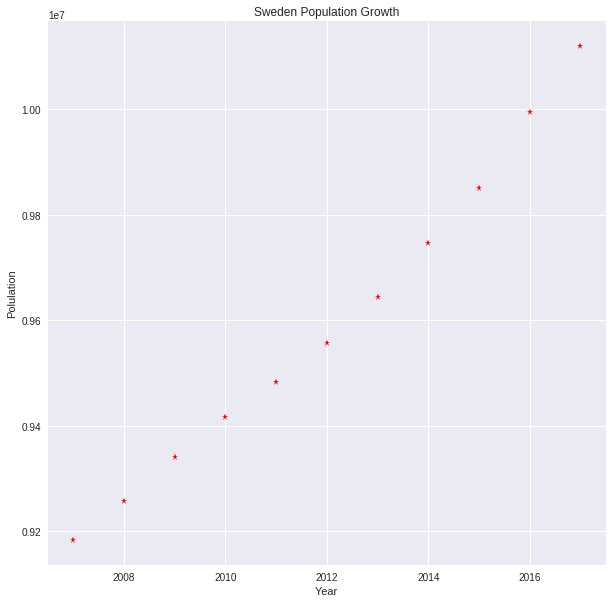

In [0]:
sns.set()
fig, ax = plt.subplots(figsize=(10,10))
ax = plt.plot(data['Year'], data['Population'], 'r*')
plt.title('Sweden Population Growth')
plt.ylabel('Polulation')
plt.xlabel('Year')

In [0]:
X = data['Year'].values
Y = data['Population'].values

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/4, random_state = 0) 

X_train = X_train.reshape(-1, 1)
Y_train = Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)

In [0]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor = regressor.fit(X_train, Y_train)


In [87]:
X_test_pred = np.append(X_test, 2020)
X_test_pred = X_test_pred.reshape(-1, 1)
Y_pred = regressor.predict(X_test_pred)

array([[ 9507221.25595239],
       [ 9954999.35119048],
       [ 9328110.01785716],
       [10313221.82738096]])

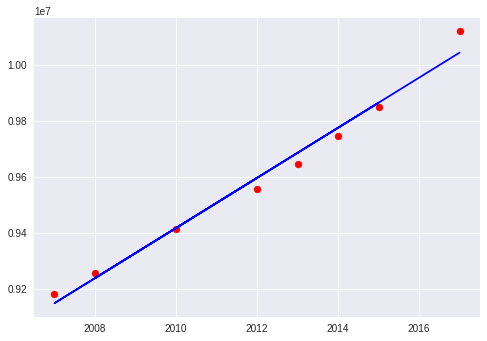

In [53]:
plt.scatter(X_train , Y_train, color = 'red')
plt.plot(X_train , regressor.predict(X_train), color ='blue')

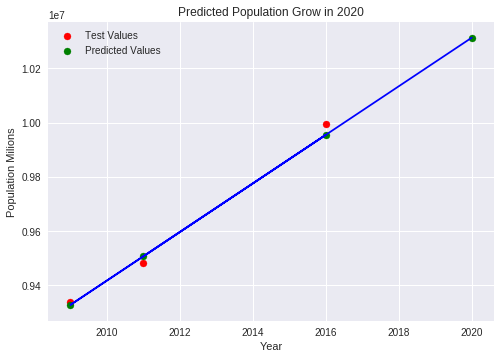

In [86]:
plt.scatter(X_test , Y_test, color = 'red', label='Test Values')
plt.scatter(X_test_pred, Y_pred, color = 'green', label='Predicted Values')
plt.plot(X_test_pred , regressor.predict(X_test_pred), color ='blue')

plt.legend(loc='best')
plt.ylabel('Population Milions')
plt.xlabel('Year')
plt.title('Predicted Population Grow in 2020')
plt.show()